# Ejercicio PCA (Principal Component Analysis)
En este ejercicio vas a trabajar con un dataset de información de ciudadanos como el estado civil, número de hijos, qué gastos e ingresos tiene, etc...

Se cuenta con un target, que es si el ciudadano va a alquilar o a comprar una vivienda. Para ello,  con PCA

### Importamos librerias
Principales librerías que usarás durante el notebook.

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

### Cargamos datos de entrada
1. Carga el csv *comprar_alquilar.csv*
2. Obtén la información básica: columnas, dimensiones, descripción de las variables, missings...

In [126]:
df=pd.read_csv(r"C:\Users\suert\OneDrive\Documentos\GitHub\Machine_Learning\2-No_Supervisado\1-PCA\Practica\data\comprar_alquilar.csv")
df

ingresos  gastos_comunes  pago_coche  gastos_otros  ahorros  vivienda   
0        6000            1000           0           600    50000    400000  \
1        6745             944         123           429    43240    636897   
2        6455            1033          98           795    57463    321779   
3        7098            1278          15           254    54506    660933   
4        6167             863         223           520    41512    348932   
..        ...             ...         ...           ...      ...       ...   
197      3831             690         352           488    10723    363120   
198      3961            1030         270           475    21880    280421   
199      3184             955         276           684    35565    388025   
200      3334             867         369           652    19985    376892   
201      3988            1157         105           382    11980    257580   

     estado_civil  hijos  trabajo  comprar  
0               0      2        2        1  
1               1      3        6        0  
2               2      1        8        1  
3               0      0        3        0  
4               0      0        3        1  
..            ...    ...      ...      ...  
197             0      0        2        0  
198             2      3        8        0  
199             1      3        8        0  
200             1      2        5        0  
201             0      0        4        0  

[202 rows x 10 columns]

In [127]:
df.describe()

ingresos  gastos_comunes  pago_coche  gastos_otros       ahorros   
count   202.000000      202.000000  202.000000    202.000000    202.000000  \
mean   4958.995050      971.584158  211.742574    515.425743  38749.668317   
std    1682.862556      272.106351  124.940754    168.103075  17365.231870   
min    2008.000000      384.000000    0.000000    201.000000  10319.000000   
25%    3513.750000      766.750000   99.000000    383.250000  24964.250000   
50%    4947.500000      968.000000  208.500000    522.500000  38523.000000   
75%    6374.500000     1165.250000  318.750000    656.750000  52150.750000   
max    7984.000000     1585.000000  448.000000    828.000000  69934.000000   

            vivienda  estado_civil       hijos     trabajo     comprar  
count     202.000000    202.000000  202.000000  202.000000  202.000000  
mean   373349.638614      1.024752    1.232673    4.490099    0.331683  
std    136371.525622      0.837184    1.367833    2.535794    0.471988  
min    176553.000000      0.000000    0.000000    0.000000    0.000000  
25%    274810.000000      0.000000    0.000000    2.000000    0.000000  
50%    340783.500000      1.000000    1.000000    5.000000    0.000000  
75%    444482.000000      2.000000    2.000000    7.000000    1.000000  
max    669540.000000      2.000000    4.000000    8.000000    1.000000

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ingresos        202 non-null    int64
 1   gastos_comunes  202 non-null    int64
 2   pago_coche      202 non-null    int64
 3   gastos_otros    202 non-null    int64
 4   ahorros         202 non-null    int64
 5   vivienda        202 non-null    int64
 6   estado_civil    202 non-null    int64
 7   hijos           202 non-null    int64
 8   trabajo         202 non-null    int64
 9   comprar         202 non-null    int64
dtypes: int64(10)
memory usage: 15.9 KB


### Visualicemos las dimensiones
Realiza un análisis univariante. Realiza la gráfica que consideres para cada variable, diferenciando por colores el target (*comprar*).

<Axes: >

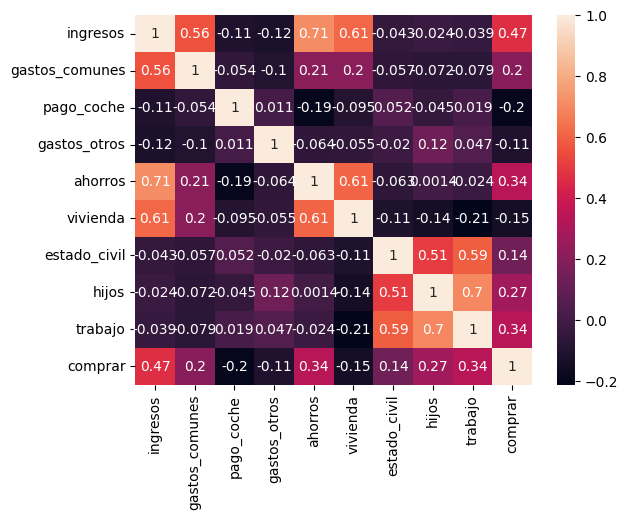

In [129]:
sns.heatmap(df.corr(), annot=True)

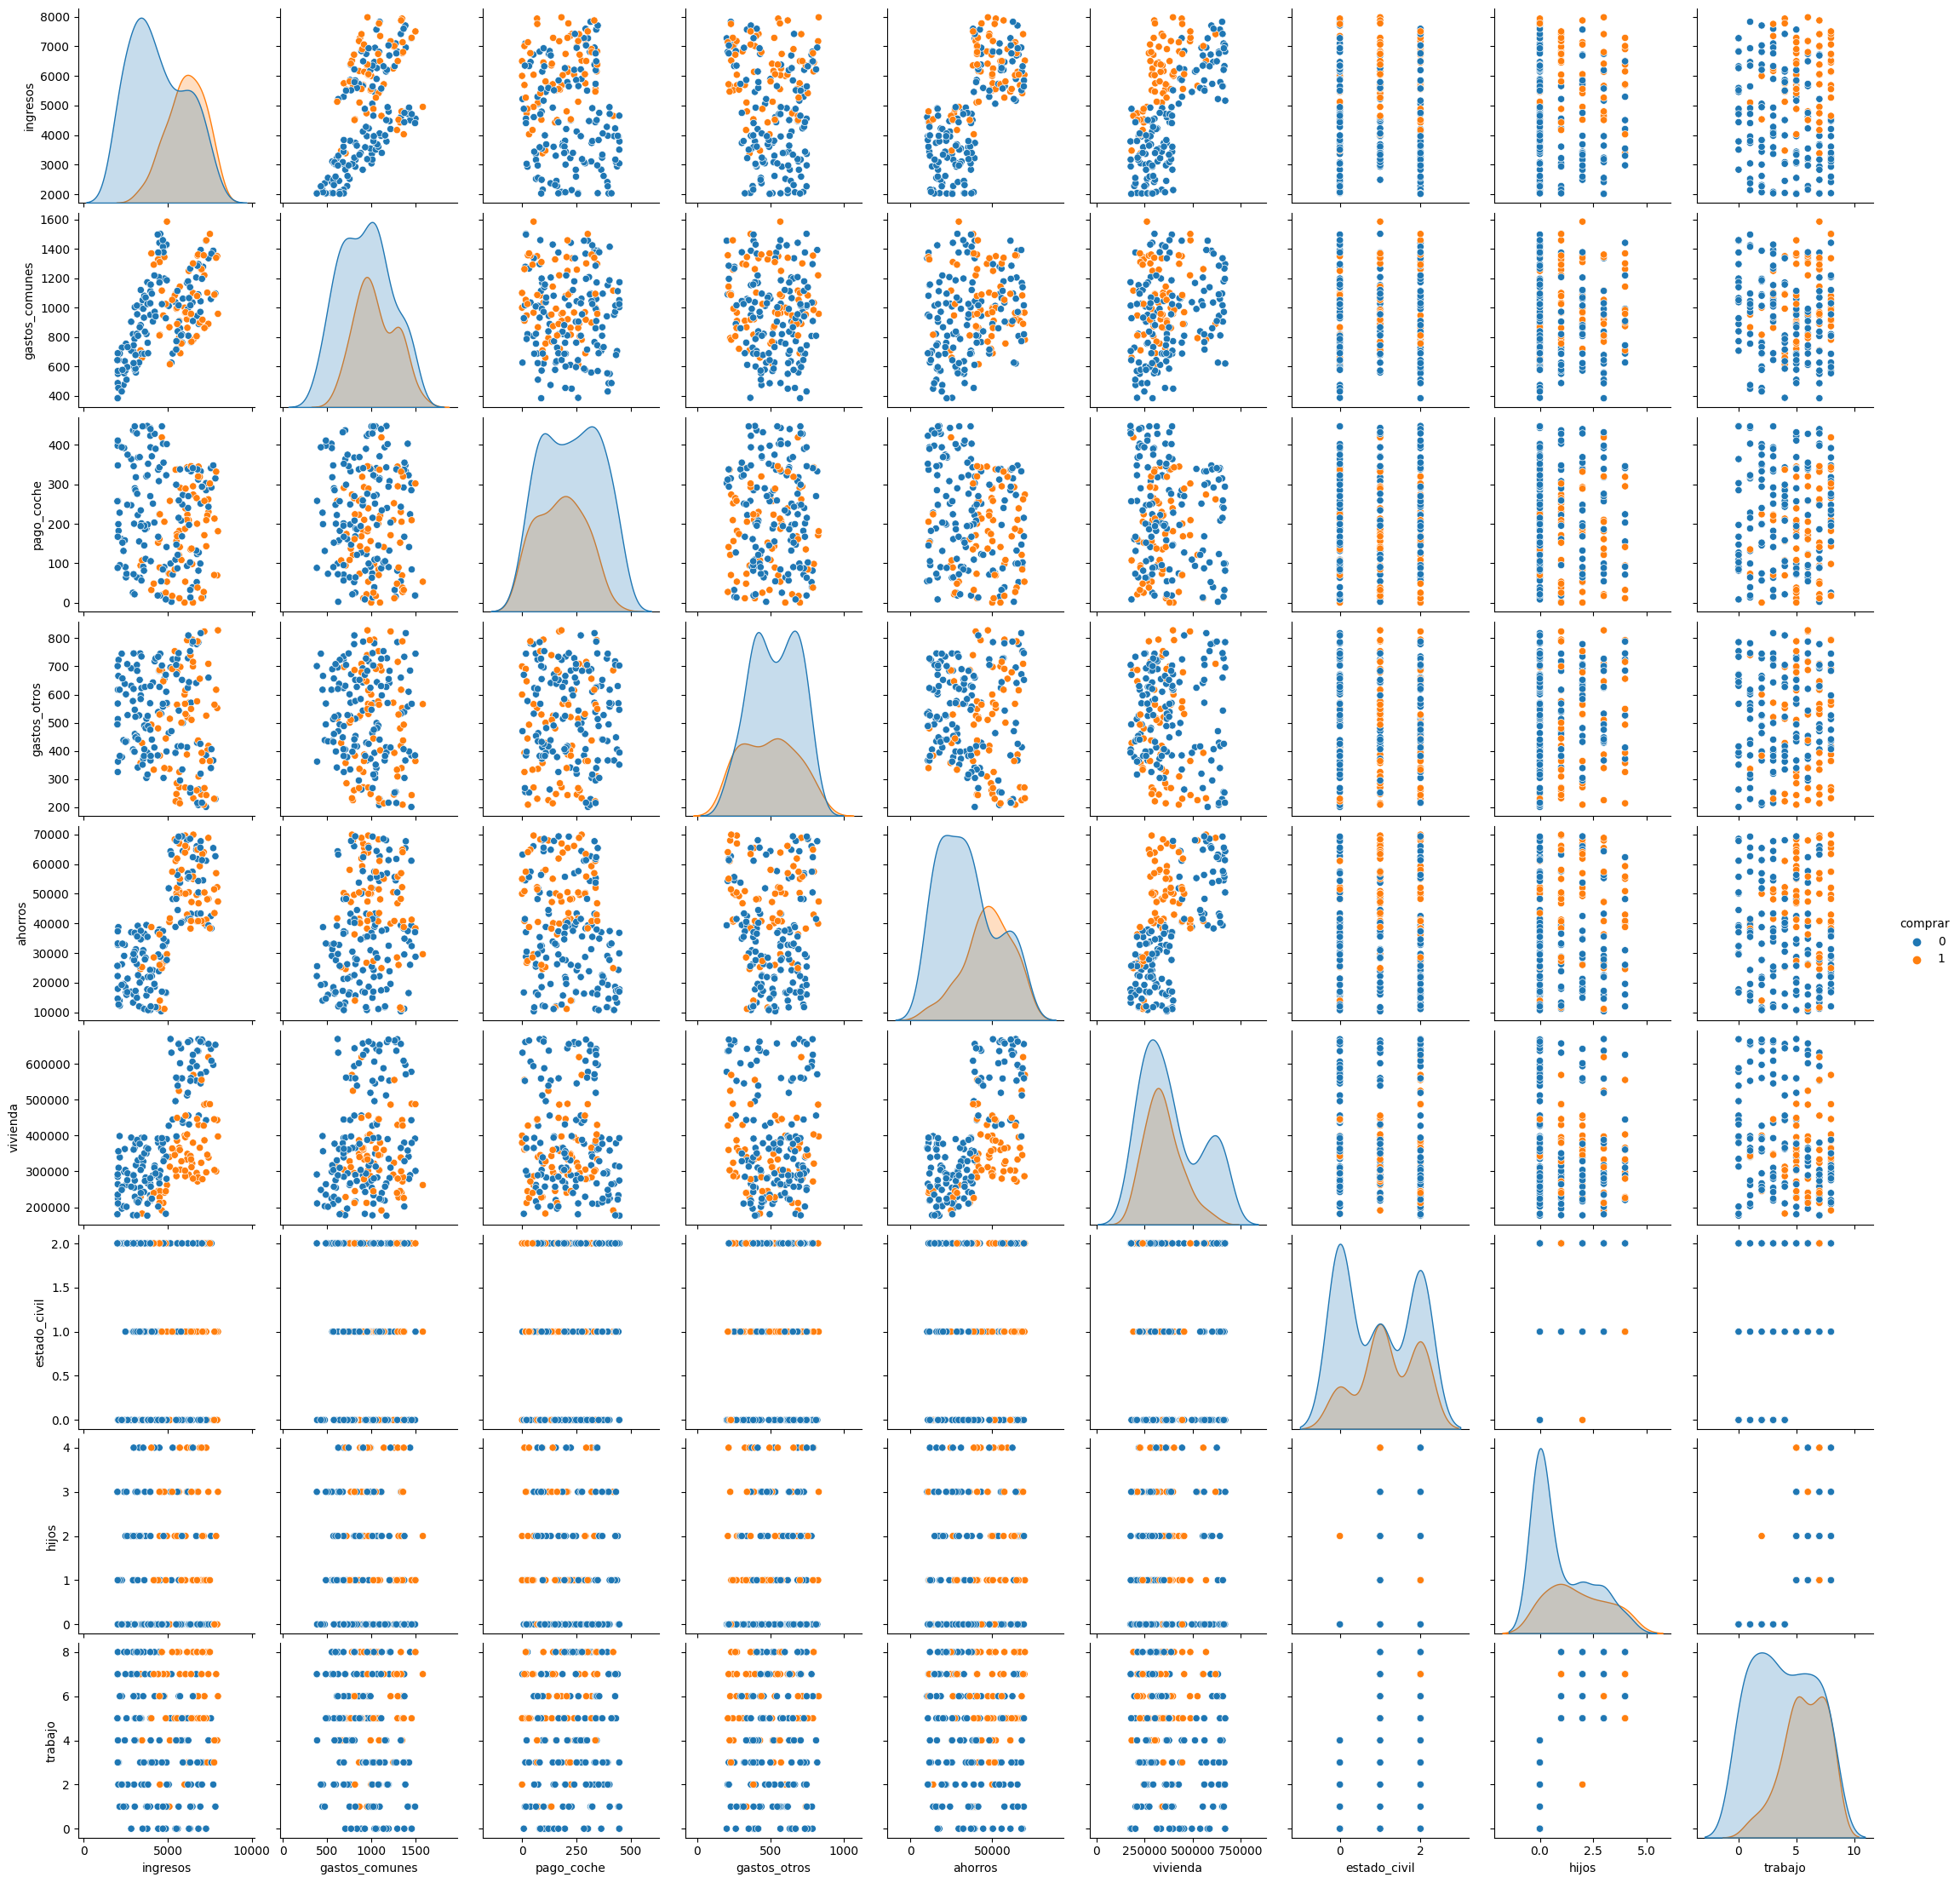

In [130]:
sns.pairplot(df, hue="comprar")

<Axes: xlabel='comprar', ylabel='count'>

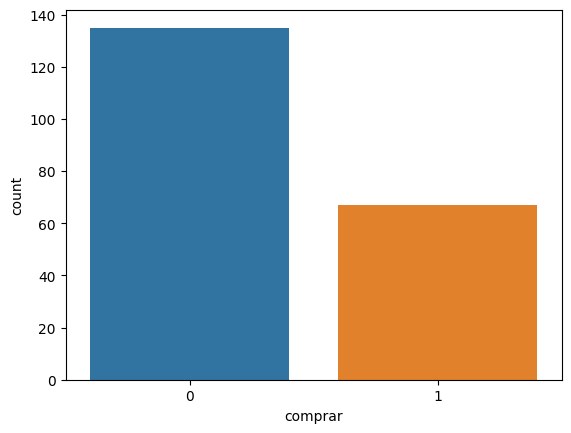

In [116]:
sns.countplot(x="comprar", data=df) 

## Estandariza los datos
Como el objetivo de estos primeros apartados no es encontrar el mejor modelo con el mejor accuracy, por sencillez, no es necesario dividir en train y test.

## Aplicamos PCA
Aplica el algoritmo de PCA para 9 components, es decir, para todas las features

In [132]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

In [133]:
pca_pipe = make_pipeline(StandardScaler(), PCA(n_components=9))
pca_pipe.fit(df)

modelo_pca = pca_pipe['pca']

In [134]:
modelo_pca.components_

array([[-0.54934302, -0.34146007,  0.15049138,  0.11746503, -0.48939638,
        -0.4412933 ,  0.15344247,  0.14007281,  0.16160045, -0.20409138],
       [ 0.15909755,  0.05584992, -0.07658077,  0.00556506,  0.13553262,
        -0.07327675,  0.45384378,  0.52400611,  0.55172097,  0.39620952],
       [ 0.01547889, -0.27036268,  0.1692496 ,  0.58506991,  0.2251488 ,
         0.49591877,  0.1478699 ,  0.18628931,  0.07154605, -0.44429353],
       [ 0.11615868,  0.2491118 ,  0.78967879, -0.40154183, -0.09350787,
         0.12457483,  0.2603972 , -0.04112256,  0.0656939 , -0.20382827],
       [-0.13379015, -0.52550381, -0.2921437 , -0.66008455,  0.16757599,
         0.28199311,  0.19632196,  0.00247784,  0.03001071, -0.19451342],
       [-0.05732063,  0.58507176, -0.47072239, -0.03977609, -0.31551545,
         0.13904418,  0.30650475,  0.07948763, -0.00861148, -0.46045932],
       [ 0.06075777, -0.10974406, -0.04461737,  0.20628126,  0.05710368,
        -0.11375472,  0.7121099 , -0.58145566

In [135]:
pd.DataFrame(
    data = modelo_pca.components_,
    columns = df.columns,
    index = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9']
)

ingresos  gastos_comunes  pago_coche  gastos_otros   ahorros  vivienda   
PC1 -0.549343       -0.341460    0.150491      0.117465 -0.489396 -0.441293  \
PC2  0.159098        0.055850   -0.076581      0.005565  0.135533 -0.073277   
PC3  0.015479       -0.270363    0.169250      0.585070  0.225149  0.495919   
PC4  0.116159        0.249112    0.789679     -0.401542 -0.093508  0.124575   
PC5 -0.133790       -0.525504   -0.292144     -0.660085  0.167576  0.281993   
PC6 -0.057321        0.585072   -0.470722     -0.039776 -0.315515  0.139044   
PC7  0.060758       -0.109744   -0.044617      0.206281  0.057104 -0.113755   
PC8 -0.062014        0.060982   -0.057275      0.032287  0.031747  0.068922   
PC9  0.303171       -0.227278   -0.024930      0.038606 -0.738158  0.461003   

     estado_civil     hijos   trabajo   comprar  
PC1      0.153442  0.140073  0.161600 -0.204091  
PC2      0.453844  0.524006  0.551721  0.396210  
PC3      0.147870  0.186289  0.071546 -0.444294  
PC4      0.260397 -0.041123  0.065694 -0.203828  
PC5      0.196322  0.002478  0.030011 -0.194513  
PC6      0.306505  0.079488 -0.008611 -0.460459  
PC7      0.712110 -0.581456 -0.210120  0.184877  
PC8     -0.196652 -0.568478  0.780884 -0.103614  
PC9     -0.043414 -0.039218  0.028632  0.304429

### Veamos cómo de buenos predictores son las nuevas dimensiones
Responde a las siguientes preguntas:
1. ¿Cuánta varianza explica cada Principal Component?
2. ¿Y de manera acumulada empezando por el PC1?
3. ¿Cuánta varianza explicarían sólo 5 componentes?

In [137]:
modelo_pca.explained_variance_ratio_

array([0.27368381, 0.23958688, 0.10991099, 0.10411098, 0.09105662,
       0.07352523, 0.0457761 , 0.02745036, 0.02469122])

In [138]:
modelo_pca.explained_variance_ratio_.cumsum()

array([0.27368381, 0.51327069, 0.62318168, 0.72729266, 0.81834928,
       0.8918745 , 0.9376506 , 0.96510097, 0.98979219])

In [139]:
np.sum(modelo_pca.explained_variance_ratio_[:5])

0.8183492789627831

### Graficamos la variacion explicada acumulada
Representa en un diagrama de lineas la evolución de la varianza acumulada en función de los PC

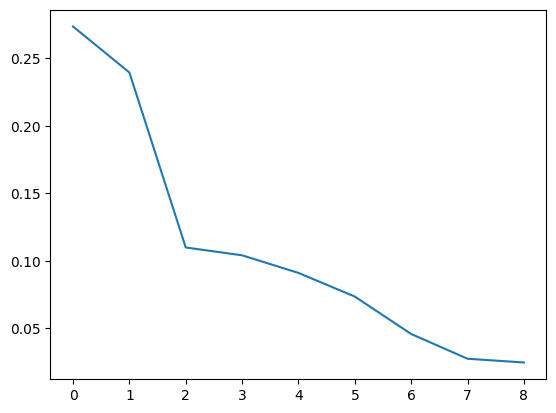

In [141]:
plt.plot(modelo_pca.explained_variance_ratio_)

### Veamos la correlación entre las nuevas componentes y las dimensiones originales
Representa en un mapa de calor los PCA vs las variables originales. Esta información la puedes obtener del atributo de PCA *components_*.

ValueError: The number of FixedLocator locations (10), usually from a call to set_ticks, does not match the number of labels (9).

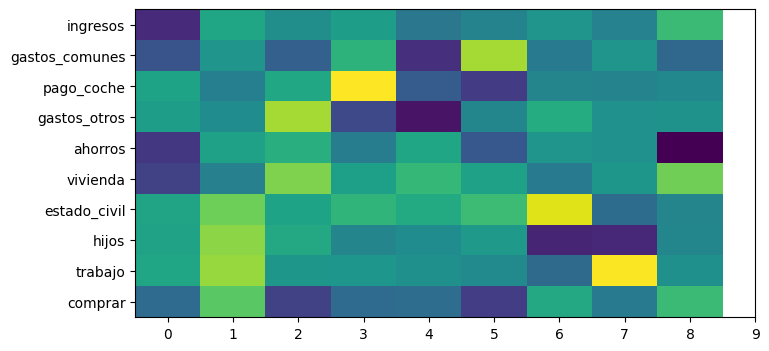

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(df.columns)), df.columns)
plt.xticks(range(len(df.columns)), np.arange(modelo_pca.n_components_)+ 1)
plt.grid(False)
plt.colorbar();

## Predicciones
1. Divide en train y test
2. Prepara un pipeline compuesto por:
    - StandardScaler,
    - PCA de 5 componentes
    - KNN con 3 vecinos
3. Entrena
4. Predice en test
5. Calcula el accuracy score en train y test
6. Representa la matriz de confusión
7. ¿Qué combinación de vecinos y componentes mejoraría el accuracy en test?
8. Guarda tu modelo

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
import joblib

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=5)),
    ('knn', KNeighborsClassifier(n_neighbors=3))
])

In [ ]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=5)),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

In [ ]:
y_pred_test = pipeline.predict(X_test)

In [ ]:
accuracy_train = accuracy_score(y_train, pipeline.predict(X_train))
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Accuracy en train: {:.2%}".format(accuracy_train))
print("Accuracy en test: {:.2%}".format(accuracy_test))

Accuracy en train: 91.30%
Accuracy en test: 75.61%


In [ ]:
confusion = confusion_matrix(y_test, y_pred_test)
print("Matriz de confusión:")
print(confusion)

Matriz de confusión:
[[21  3]
 [ 7 10]]


Guarda el modelo

In [ ]:
import pickle

